<a href="https://colab.research.google.com/github/fianadew/Explanatory-Data-Analysis/blob/main/Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUBMISSION 1 EXPERT CLASS MACHINE LEARNING**

# **NAMA : FIANA DEWI**



# **EMPLOYEE MENTAL HEALTH WHEN PANDEMIC**
## **Are Yours Employee Burnings Out?**

Memahami apa yang menjadi penyebab Burn Out bagi karyawan yang bekerja di suatu organisasi berdasarkan situasi pandemi saat ini yang mana bekerja dari rumah merupakan sebuah keuntungan ataupun kerugian. Tujuan pembuatan ini adalah untuk meningkatkan kesadaran tentang masalah kesehatan mental di seluruh dunia dan memobilisasi upaya untuk mendukung kesehatan mental. Menurut survei, sekitar 450 juta orang hidup dengan gangguan mental yang dapat menjadi salah satu penyebab utama kesehatan dan kecacatan yang buruk di seluruh dunia. Setiap hari ketika dunia menderita situasi pandemi, menjadi sangat sulit untuk menjaga kebugaran mental.



**Memahami Dataset** 

1.   Employee ID: ID unik milik setiap karyawan
2.   Date of Joining: tanggal karyawan bergabung dengan perusahaan (example: 2008-12-30)
3. Gender: Jenis kelamin karyawan (Male/Female)
4. Company Type: Jenis perusahaan tempat karyawan bekerja (Service/Product)
5. WFH Setup Available: Apakah perusahaan melakukan WFH? (Yes/No)
6. Designation: Kualifikasi keahlian yang harus ada ketika melakukan suatu pekerjaan dengan rentang nilai [0.0, 5.0] yang artinya semakin besar nilai semakin tinggi kualifikasi yang diperlukan
7. Resource Allocation: Jumlah waktu bekerja dalam rentang [1.0, 10.0] artinya semakin besar nilai semakin tinggi jumlah waktu bekerja
8. Mental Fatigue Score: Tingkat kelelahan mental yang dihadapi karyawan dalam rentang [0.0, 10.0] dimana nilai 0.0 berarti mental tidak lelah dan nilai 10.0 berarti mental sangat lelah
9. Burn Rate: Nilai yang perlu kita prediksi untuk setiap karyawan untuk mengetahui tingkat Burn out saat bekerja dalam rentang [0.0, 1.0] dimana semakin besar nilai akan semakin tinggi tingkat burn rate nya

**Apa yang akan dilakukan?**
Disini akan membuat prediksi regresi dengan targetnya adalah Burn Out berdasarkan predictor yang telah diberikan dengan menggunakan beberapa model machine learning yaitu KNN Regression, Linear Regression dan Deep Learning sekaligus mengecek model terbaik dengan tingkat akurasi yang tertinggi.


## **MEMBACA DATASET**
Dataset diperoleh dari Kaggle. Apabila Anda tertarik untuk melakukan penelitian iini juga dapat mengakses link berikut [dataset](https://www.kaggle.com/blurredmachine/are-your-employees-burning-out)

In [ ]:
import pandas as pd #library untuk manipulasi data
import numpy as np #library untuk pengolahan angka
import seaborn as sns #library untuk visualisasi
import matplotlib.pyplot as plt #library untuk visualisasi

from sklearn.preprocessing import OneHotEncoder #library untuk encode categorical data
from sklearn.decomposition import PCA #reduksi feature numerical
from sklearn.model_selection import train_test_split #membagi data train dan test
from sklearn.preprocessing import StandardScaler #scaling data

from google.colab import drive #membaca folder atau mengambil data dari google drive
import zipfile, os #unzip file
import datetime as dt #ubah format waktu dan tanggal

Memasukkan seluruh library yang diperlukan baik untuk pengolahan data, visualisasi data, pengolahan angka dan library machine learning

In [ ]:
drive.mount('/content/gdrive') #memiinta izin autentifikasi google drive

Mounted at /content/gdrive


Autentifikasi google drive

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Kaggle' #mengambil data dari folder kaggle

Path forlder yang akan digunakan untuk mengmabil atau membaca data dengan tujuan mendowload data langsung dari kagglenya

In [ ]:
!kaggle datasets download -d blurredmachine/are-your-employees-burning-out #download data dari kaggle

  0% 0.00/425k [00:00<?, ?B/s]
100% 425k/425k [00:00<00:00, 58.6MB/s]


Download data langsung dari kaggle (copy API command)

In [ ]:
local_zip = '/content/are-your-employees-burning-out.zip' #path data yang telah didownload sebelumnya
ref_zip = zipfile.ZipFile(local_zip, 'r') #membaca file zip
ref_zip.extractall('/burn_out') #extract zip/ unzip file menjadi folder folder
ref_zip.close() #menutup koneksi

Unzip file dan menyimpan datanya di folder lain

In [ ]:
train_dataset = pd.read_csv('/burn_out/train.csv') #membaca data train
test_dataset = pd.read_csv('/burn_out/test.csv') #membaca data test
train_dataset.head() #membaca 5 data pertama data train

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


Membaca data test dan data train sebanyak 5 teratas

In [ ]:
print(train_dataset.shape) #membaca bentuk (baris, kolom) data train 
print(test_dataset.shape) #membaca bentuk (baris, kolom) data test

(22750, 9)
(12250, 8)


Membaca bentuk (baris, kolom) data train dan data test

In [ ]:
train_dataset.dtypes #membaca tipe data tiap kolom

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

Membaca tipe data tiap kolom dan ternyata date of joining memiliki tipe data object (string), karena kedepannya kita akan melakukan pengolahan data untuk mengetahui seberapa lama bekerja seorang karyawan di perusahaan, oleh karena itu tipe datanya harus diubah kedalam bentuk datetime

In [ ]:
#Mengubah tipe data date menjadi date time
train_dataset['Date of Joining'] = pd.to_datetime(train_dataset['Date of Joining'])
test_dataset['Date of Joining'] = pd.to_datetime(test_dataset['Date of Joining'])

#Mengambil waktu hari ini 
train_dataset['today'] = dt.date.today()
test_dataset['today'] = dt.date.today()

#Mengubah tipe data today
train_dataset['today'] = pd.to_datetime(train_dataset['today'])
test_dataset['today'] = pd.to_datetime(test_dataset['today'])

#Mengurangi tanggal masuk kerja dengan tanggal hari ini untuk menentukan lama waktu bekerja
train_dataset['lama_bekerja'] = train_dataset['today'] - train_dataset['Date of Joining']
test_dataset['lama_bekerja'] = test_dataset['today'] - test_dataset['Date of Joining']

Proses diatas merupakan proses yang berfungsi untuk mencari sudah berapa lama kah seorang karyawan telah bekerja pada suatu perusahaan dengan asumsi bahwa lama bekerja dapat berkorelasi dalam mempengaruhi burn out. Lama bekerja diperoleh dari tanggal hari ini (dt.date.today()) dikurangi dengan tanggal karyawan masuk bekerja pada suatu perusahaan yang mana datanya telah tersedia didalam dataset. Hail pengurangan yang diperoleh akan berbentuk tipe data delta time, oleh karena itu pada proses selanjutnya kita perlu mengubah tipe datanya menjadi integer agar mudah dalam melakukan pengolahan data

In [ ]:
train_dataset['lama_bekerja'] = (train_dataset['lama_bekerja']).dt.days #convert data mejadi integer days
test_dataset['lama_bekerja'] = (test_dataset['lama_bekerja']).dt.days #conver data menjadi integer days

Fungsi dt.days merupakan fungsi yang berguna untuk mengconvert tipe data delta time menjadi integer 

In [ ]:
train_dataset = train_dataset.drop(columns=['Employee ID', 'Date of Joining', 'today']) #menghapus kolom yang tidak diperlukan pada data train
test_dataset = test_dataset.drop(columns=['Employee ID', 'Date of Joining', 'today']) #menghapus kolom yang tidak diperlukan pada data test

Tanggal masuk, tanggal hari ini dan ID karyawan sudah tidak diperlukan dalam pengolahan data karena sebelumnya kita telah mendapatkan lama seseorang bekerja. Karena kolom tersebut sudah tidak diperlukan, maka lebih baik kolom tersebut dihapus agar tidak mempengaruhi hasil akhir

In [ ]:
print('Tipe data setiap kolom Train Dataset')
print(train_dataset.dtypes) #mengecek kembali tipe data tiap kolom
print('\nJumlah Missing Values Setiap Columns Train Dataset')
print(train_dataset.isnull().sum()) #mengecek kolom yang memiliki missing values

Tipe data setiap kolom Train Dataset
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
lama_bekerja              int64
dtype: object

Jumlah Missing Values Setiap Columns Train Dataset
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
lama_bekerja               0
dtype: int64


Tipe Data dan Missing Values Data Train


*   Tipe data terdiri dari categorical data (object) dan numerical data (float, int) 
*   Missing values terdapat di kolom resource allocation, mental fatihue score, dan burn rate dengan jumlah dalam rentang 1000 - 2000 missing values dari 22000 jumlah data yang ada, oleh karena jumlah missing values juga banyak, maka missing values tersebut akan diisi dengan median tiap kolom tersebut



In [ ]:
print('Tipe data setiap kolom Test Dataset')
print(test_dataset.dtypes)
print('\nJumlah Missing Values Setiap Columns Test Dataset')
print(test_dataset.isnull().sum())

Tipe data setiap kolom Test Dataset
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
lama_bekerja              int64
dtype: object

Jumlah Missing Values Setiap Columns Test Dataset
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
lama_bekerja            0
dtype: int64


Tipe Data dan Missing Values Data Test


*   Tipe data terdiri dari categorical data (object) dan numerical data (float, int)
*   Tidak ada missing values



## **HANDLING MISSING VALUES**
Missing values akan diisi dengan nilai median

In [ ]:
#mengisi missing values dengan median
train_dataset['Resource Allocation'] = train_dataset['Resource Allocation'].fillna(train_dataset['Resource Allocation'].median())
train_dataset['Mental Fatigue Score'] = train_dataset['Mental Fatigue Score'].fillna(train_dataset['Mental Fatigue Score'].median())
train_dataset['Burn Rate'] = train_dataset['Burn Rate'].fillna(train_dataset['Burn Rate'].median())

Kolom yang terdapat missing values dilakukan imputing dengan mengisinya dengan median

In [ ]:
#mengecek missing values lagi
print('\nJumlah Missing Values Setiap Columns Train Dataset')
print(train_dataset.isnull().sum())


Jumlah Missing Values Setiap Columns Train Dataset
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
lama_bekerja            0
dtype: int64


Data train saat ini sudah tidak ada missing values lagi sehingga pengolahan data dapat dilanjutkan

In [ ]:
#cek deskripsi data
train_dataset.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,lama_bekerja
count,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.452176,5.744176,0.451906,4853.605495
std,1.135145,1.987427,1.829962,0.193268,105.348190
min,0.000000,1.000000,0.000000,0.000000,4671.000000
25%,1.000000,3.000000,4.700000,0.320000,4763.000000
50%,2.000000,4.000000,5.900000,0.450000,4853.000000
75%,3.000000,6.000000,6.900000,0.580000,4945.000000
max,5.000000,10.000000,10.000000,1.000000,5036.000000


Berdasarkan deskripsi data diatas, dapat dilihat bahwa mental fatigue, burn rate dan designation mempunyai nilai minimal adalah 0 artinya bahwa terdapat karyawan yang tidak memiliki mental issue atau mentalnya terjaga bugar. Selain itu, nilai maksimum deskripsi data diatas juga telah sesuai dengan kriteria yang telah ditentukan sebelumnya yaitu max designation adalah 5, max mental fatigue adalah 10 dan max  burn out adalah 1

## **ANALISIS CATEGORICAL DATA**



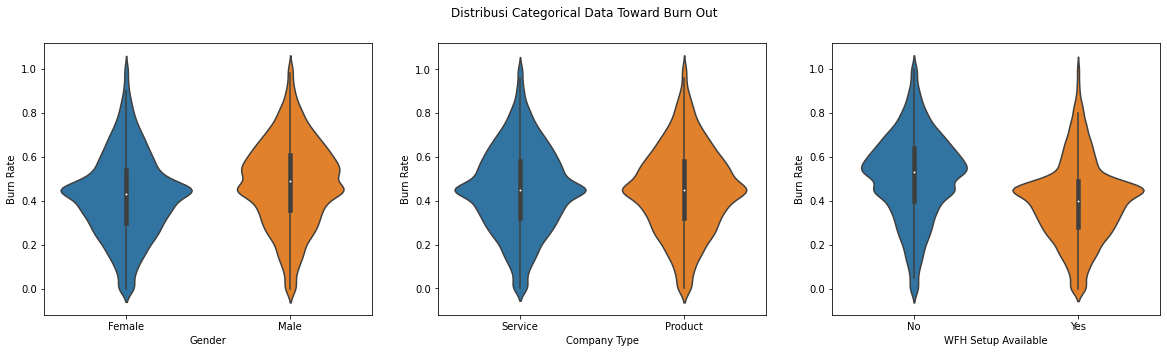

In [ ]:
#distribusi data menggunakan violin plot
figure, axes = plt.subplots(1,3, figsize=(20,5))
figure.suptitle('Distribusi Categorical Data Toward Burn Out')
#visualisasi violin plot
sns.violinplot(ax=axes[0], x='Gender', y='Burn Rate', data=train_dataset)
sns.violinplot(ax=axes[1], x='Company Type', y='Burn Rate', data=train_dataset)
sns.violinplot(ax=axes[2], x='WFH Setup Available', y='Burn Rate', data=train_dataset)

Berdasarkan analisis distribusi data violin plot diatas dapat disimpulkan bahwa :


*   Perempuan lebih banyak terkena burn rate dibandingkan laki laki, namun tingkat burn rate lebih tinggi pada laki - laki dibandingkan wakita. Rata rata burn rate untuk wanita adalah 4, sementara rata - rata burn rate laki - laki adalah 5
*   Tipe perusahaan tidak terlalu mempengaruhi tingkat burn rate, baik perusahaan layanan maupun produk sama sama memiliki kemungkinanan untuk memberikan tingkat burn rate kepada karyawannya. Rata - rata burn rate karyawan baik perusahaan layanan maupun produk sekitaran bernilai 4.5


*   Perusahaan yang memberikan pekerjaan WFH memberikan pengaruh tingkatan burn rate yang lebih kecil dibandingkan dengan perusahaan onsite atau tidak WFH.





## **ANALISIS NUMERICAL DATA**

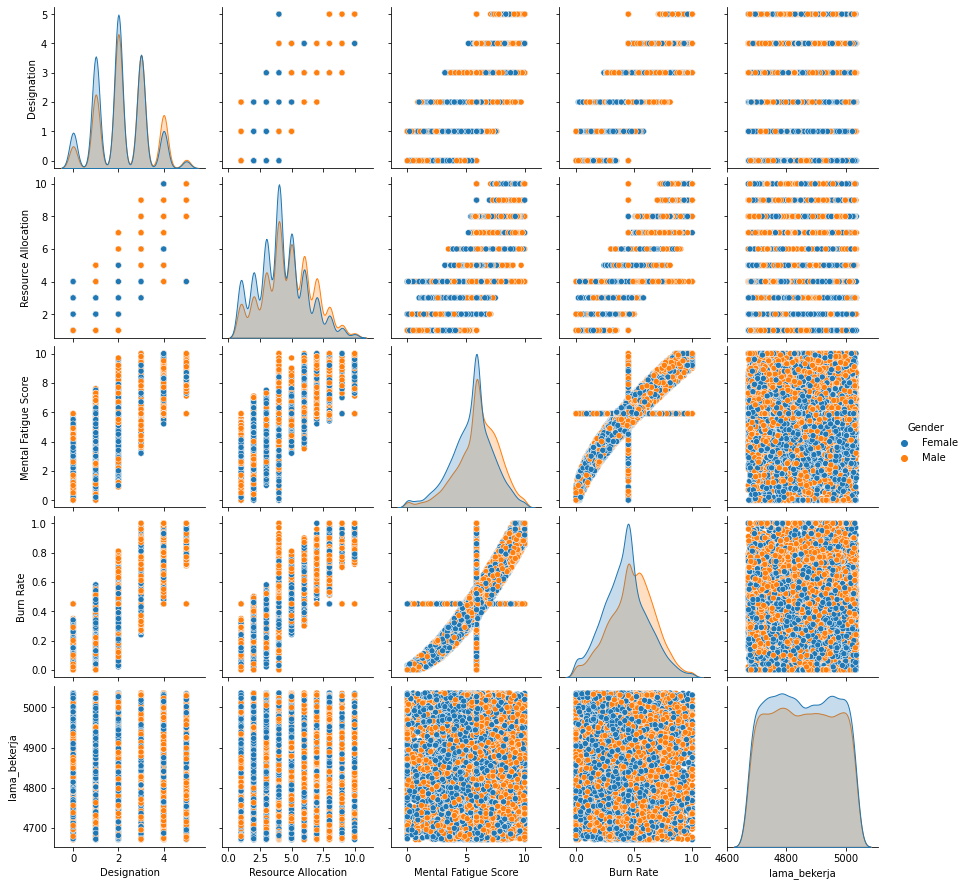

In [ ]:
#membuat pairplot berdasarkan jenis kelamin
sns.pairplot(train_dataset, hue='Gender')

Berdasarkan pariplot diatas dapat disimpulkan bahwa :


*   Korelasi tertinggi yang mempengaruhi burn rate adalah mental fatigue dengan kemudian resource allocation dan terakhir designation
*   Lama bekerja tidak mempengaruhi terjadinya burn rate



## **CORRELATION HEATMAP**

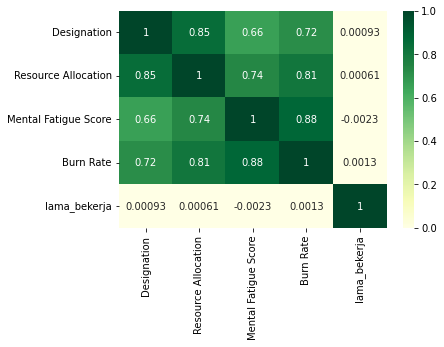

In [ ]:
corr = train_dataset.corr()
sns.heatmap(corr, annot=True, cmap="YlGn")

Berdasarkan korelasi heatmap juga memperlihatkan hasil bahwa lama bekerja tidak mempengaruhi burn rate dan lainnya yang diindikasikan dengan nilai korelasi mendekati 0, sementara itu faktor lainnya memiliki pengaruh yang significant terhadap burn rate terutama mental fatigue yang memiliki nilai korelasi 0.88, kemudian resource allocation bernilai 0.81 dan terakhir designation sebesar 0.72. Oleh karena lama bekerja ternyata tidak mempengaruhi terjadinya burn rate, maka kedepannya kolom ini akan dihapus

In [ ]:
#menghapus kolom lama bekerja
train_dataset = train_dataset.drop(columns='lama_bekerja')

Proses diatas merupakan proses menghapus kolom lama bekerja

## **ENCODING CATEGORICAL DATA**

In [ ]:
#encoding data categorical menggunakan one hot encoder
train_dataset = pd.concat([train_dataset, pd.get_dummies(train_dataset['Gender'], prefix='gender')], axis=1)
train_dataset = pd.concat([train_dataset, pd.get_dummies(train_dataset['Company Type'], prefix='type')], axis=1)
train_dataset = pd.concat([train_dataset, pd.get_dummies(train_dataset['WFH Setup Available'], prefix='WFH')], axis=1)
train_dataset = train_dataset.drop(columns=['Gender', 'Company Type', 'WFH Setup Available'])
train_dataset.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,gender_Female,gender_Male,type_Product,type_Service,WFH_No,WFH_Yes
0,2.0,3.0,3.8,0.16,1,0,0,1,1,0
1,1.0,2.0,5.0,0.36,0,1,0,1,0,1
2,2.0,4.0,5.8,0.49,1,0,1,0,0,1
3,1.0,1.0,2.6,0.20,0,1,0,1,0,1
4,3.0,7.0,6.9,0.52,1,0,0,1,1,0


Melakukan encoder data categorical yaitu gender, type company dan WFH or not menjadi variabel numeric dengan menggunakan fungsi pandas yaitu get_dummies

## **FEATURE REDUCTION**

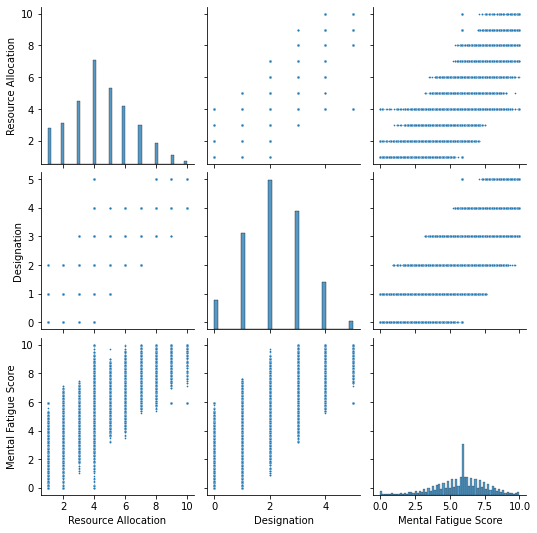

In [ ]:
#mengecek variabel yang palng berkorelasi 
sns.pairplot(train_dataset[['Resource Allocation', 'Designation', 'Mental Fatigue Score']], plot_kws={'s':3})

Melakukan pairplot data numerical untuk mengetahui korelasi antar variabel yang paling tinggi sehingga dapat dilakukan reduksi feature dengan menggabungkan kedua nilai tersebut tanpa mengurangi nilai/ value yang terkandung didalamnya. Ternyata mental ftugue dengan resource allocation memiliki korelasi palng kuat diantara lainnya

In [ ]:
#featue reduksi menggunakan PCA karena bentuk data numerical
pca = PCA(n_components=1, random_state=123)
pca.fit(train_dataset[['Resource Allocation', 'Mental Fatigue Score']])
train_dataset['mental_factors']= pca.transform(train_dataset.loc[:, ('Resource Allocation', 'Mental Fatigue Score')]).flatten()
train_dataset = train_dataset.drop(columns=['Resource Allocation', 'Mental Fatigue Score'])

Melakukan fitur reduksi menggunakan PCA antara variabel metal fatigue dengan resource allocation menjadi satu fitur yaitu mentals faktor. Penggunaan PCA karena tipe datanya numerik 

In [ ]:
#membaca data train terbaru
train_dataset.head()

,Designation,Burn Rate,gender_Female,gender_Male,type_Product,type_Service,WFH_No,WFH_Yes,mental_factors
0,2.0,0.16,1,0,0,1,1,0,-2.378457
1,1.0,0.36,0,1,0,1,0,1,-2.323968
2,2.0,0.49,1,0,1,0,0,1,-0.299850
3,1.0,0.20,0,1,0,1,0,1,-4.669213
4,3.0,0.52,1,0,0,1,1,0,2.669668


Membaca data train yang telah direduksi

## **TRAIN TEST SPLIT**

In [ ]:
x=train_dataset.drop(columns='Burn Rate') #menghapus kolom target
y=train_dataset['Burn Rate'] #menyimpan kolom target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123) #membagi data train dengan data test

Membagi data train dengan data test dengan perbandingan 80 : 20 menggunakan train test split

In [ ]:
print(f'Total seluruh sampel : {len(x)}') #cek seluruh sampel
print(f'Total sampel train : {len(x_train)}') #cek sampel data train
print(f'Total sampel test : {len(x_test)}') #cek sampe data test

Total seluruh sampel : 22750
Total sampel train : 18200
Total sampel test : 4550


Mengecek jumlah seluruh sampel, sampel data train dan sampel data test

## **STANDARISASI**

In [ ]:
numerical_features = ['mental_factors', 'Designation'] #list numerical feture
scaler = StandardScaler() #memanggil fungsi standar scaler
scaler.fit(x_train[numerical_features]) #proses standar scaler
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
x_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,mental_factors,Designation
17932,0.178096,0.726890
1236,0.764830,-0.153427
2024,2.243739,2.487523
5818,-2.375613,-1.033743
18352,-1.577277,-0.153427


Melakukan standarisasi menggunakan StandardScaler dengan tujuan untuk memiliki performa yang lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Standarisasi membuat mean data menjadi 0 dan std data menjadi 1

In [ ]:
#deskripsi data train
x_train.describe()

,Designation,gender_Female,gender_Male,type_Product,type_Service,WFH_No,WFH_Yes,mental_factors
count,1.820000e+04,18200.000000,18200.000000,18200.000000,18200.000000,18200.000000,18200.000000,1.820000e+04
mean,-4.458826e-16,0.521374,0.478626,0.348462,0.651538,0.457253,0.542747,2.379049e-19
std,1.000027e+00,0.499557,0.499557,0.476496,0.476496,0.498183,0.498183,1.000027e+00
min,-1.914060e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.534315e+00
25%,-1.033743e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.466901e-01
50%,-1.534266e-01,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-2.867663e-02
75%,7.268900e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.818579e-01
max,2.487523e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.772743e+00


Deskripsi data dilakukan untuk memastikan bahwa setalah melakukan standarisasi, nilai mean menjadi 0 dan nilai std menjadi 1. Berdasarkan nilai deskripsi diatas, nilai mean numerical data tidak 0, namun nilai std nya bernilai 0. Hal tersebut cukup bagus untuk melanjutkan pemrosesan data

# **MODELLING**

## **KNN REGRESI**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor #memanggil fungsi KNN regresi
from sklearn.metrics import mean_absolute_error #evaluasi matrics menggunakan mae

mae_val = [] #menyimpan hasil evaluasi matrics mae dari data test

for k in range(20): #iterasi nilai k neighbor dari 1 sampai 20
  k=k+1
  knn = KNeighborsRegressor(n_neighbors = k)
  knn.fit(x_train, y_train)
  prediksi = knn.predict(x_test)
  error = mean_absolute_error(y_test,prediksi)
  mae_val.append(error)
  print('RMSE K : ', k, 'adalah ', error)

RMSE K :  1 adalah  0.2055846153846154
RMSE K :  2 adalah  0.1942362637362637
RMSE K :  3 adalah  0.18065494505494506
RMSE K :  4 adalah  0.17631098901098902
RMSE K :  5 adalah  0.17028835164835165
RMSE K :  6 adalah  0.16743553113553114
RMSE K :  7 adalah  0.16452872841444266
RMSE K :  8 adalah  0.16343351648351648
RMSE K :  9 adalah  0.16134896214896213
RMSE K :  10 adalah  0.15940043956043956
RMSE K :  11 adalah  0.15845394605394605
RMSE K :  12 adalah  0.15764945054945054
RMSE K :  13 adalah  0.15576483516483516
RMSE K :  14 adalah  0.15435918367346937
RMSE K :  15 adalah  0.15274490842490843
RMSE K :  16 adalah  0.1506118131868132
RMSE K :  17 adalah  0.15007679379444083
RMSE K :  18 adalah  0.14975531135531137
RMSE K :  19 adalah  0.1491312897628687
RMSE K :  20 adalah  0.14857142857142858


Diatas merupakan modelling regresi menggunakan KNN dengan matrik evaluasinya dalah mae (mean absolute error0. Penggunaan matriks mae ini karena dapat menghilangkan nilai negatif yang mana dapat membuat nilai error menjadi 0. Berdasarkan hasil iterasi k tersebut, dapat diketahui bahwa nilai k yang memiliki nilai mae terendah adalah k dengan nilai 20, oleh karena itu pada proses prediksi selanjutnya akan menggunakan nilai K = 20 sebagai pemodelan

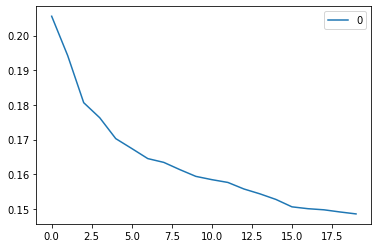

In [ ]:
#visualisasi nilai k
curve = pd.DataFrame(mae_val)
curve.plot()

Membuat visualisasi nilai iterasi k yang telah dilakukan sebelumnya

In [ ]:
#membuat prediksi dari 10 data train teratas dengan nilai targetnya adalah y
predik  = []
akt = []
knn = KNeighborsRegressor(n_neighbors = 20)
knn.fit(x_train, y_train)
predik.append(knn.predict(x_train.head(20)))
akt.append(y_train.values[:20])

Untuk mencoba apakah model yang telah dibuat tadi dapat memperediksi nilai dengan benar, maka kita akan mencoba melatih model kembali, namun dengan data testnya dalah 10 data train pertama sehingga dapat mencocokkan data hasil prediksi data trainn dengan data sebenarnya.

In [ ]:
#mengubah bentuk kolom dataframe yang semula horizontal menjadi vertikal
prediks = pd.DataFrame(predik)
aktual = pd.DataFrame(akt)

prediks = prediks.melt(
        var_name="id", 
        value_name="prediksi")

aktual = aktual.melt(
        var_name="id", 
        value_name="aktual")


Mengubah bentuk kolom dataframe yang semula horizontal menjadi vertikal menggunakan fungsi pandas melt

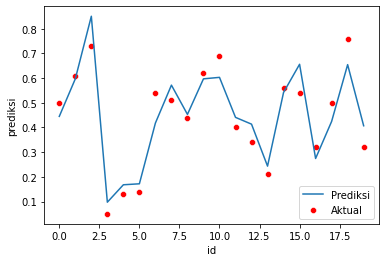

In [ ]:
#visualisasi data prediksi dengan data aktual sebenarnya
sns.lineplot(x='id', y='prediksi', data=prediks, label='Prediksi')
sns.scatterplot(x='id', y='aktual', data=aktual, label='Aktual', color='red')

Dapat dilihat bahwa hasil data prediksi dengan data aktual tidak berbeda jauh sehingga dapat dikatakan bahwa model ini lumayan akurat

## **NEURAL NETWORK**

In [ ]:
#cek bentuk (rows, columns)
x_train.shape

(18200, 8)

Cek bentk data (rows, columns) data train

In [ ]:
from keras.models import Sequential #model NN nya sequential
from keras.layers import Dense #Layer

model = Sequential([
                    Dense(258, activation='relu', input_shape=(8,)),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(4, activation='relu'),
                    Dense(1)
])

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error']) #evaluasi metrics nya menggunakan mae sama seperti sebelumnya

hist = model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=32) #melakukan pelatihan model

Epoch 1/20
455/455 [==============================] - 2s 2ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - val_loss: 0.0614 - val_mean_absolute_error: 0.0614
Epoch 2/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - val_loss: 0.0616 - val_mean_absolute_error: 0.0616
Epoch 3/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - val_loss: 0.0610 - val_mean_absolute_error: 0.0610
Epoch 4/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - val_loss: 0.0603 - val_mean_absolute_error: 0.0603
Epoch 5/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - val_loss: 0.0613 - val_mean_absolute_error: 0.0613
Epoch 6/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - val_loss: 0.0644 - val_mean_absolute_error: 0.0644
Epoch 7/20
455/4

Membuat modelling neural network dengan metrics evaluasi nya dalah mae. Hasil nya dalah nilai mae nya 0.05

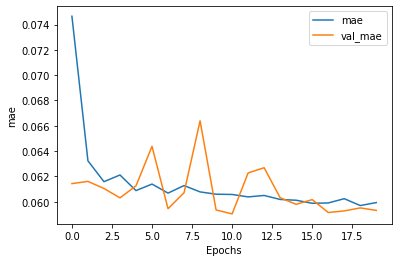

In [ ]:
#visuliasis metrics neural network
mae = hist.history['mean_absolute_error']
val_mae = hist.history['val_mean_absolute_error']
plt.plot(mae, label='mae')
plt.plot(val_mae, label='val_mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

# **EVALUASI MODELLING KNN DAN NEURAL NETWORK**

Berdasarkan hasil metrics kedua evaluasi dengan menggunakan model KNN dan Neural Network diperoleh hasil bahwa :


1.   KNN : 0.14
2.   Neural Network : 0.05

Nilai MAE terendah dapat dihasilkan dari modelling neural network, sehingga nilai error yang dihaslkan model neural network lebih kecil dan hasil yang diperoleh akan lebih akurat.

## **KESIMPULAN**
Model terbaik untuk memprediksi burn rate karyawan suatu perusahaan adalah **neural network**
